In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [69]:
df = pd.read_csv('insurance.csv')

In [70]:
education_map = {
    'JD': 5, 'PhD': 4, 'Masters': 3,
    'College': 2, 'High School': 1, 'MD': 5
}
df['insured_education_level'] = df['insured_education_level'].map(education_map)


categorical_cols = [
    'policy_state', 'policy_csl', 'insured_sex',
    'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'incident_type', 'collision_type', 'incident_severity',
    'authorities_contacted', 'incident_state', 'auto_make'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [82]:
y=df['fraud_reported']
y = le.fit_transform(y)

In [44]:
drop_columns = [
    'policy_number','policy_bind_date','incident_date','fraud_reported','auto_model','incident_city', 'incident_location','property_damage','police_report_available'         
]

In [ ]:
features = df.drop(columns=drop_columns)

In [46]:
X = df.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
df['fraud_reported'] = y


C:\Users\hebal\AppData\Local\Temp\ipykernel_12600\2279343679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fraud_reported'] = y


In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.15282123 0.06652988]


In [96]:
df['fraud_reported']

0      1
1      1
2      0
3      1
5      1
      ..
993    0
994    0
995    0
996    0
997    0
Name: fraud_reported, Length: 855, dtype: int64

In [85]:
df = df.dropna(subset=['insured_education_level'])

In [86]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [87]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df['cluster'] = clusters


In [88]:
fraud_by_cluster = df.groupby('cluster')['fraud_reported'].mean()
print("Fraud Rate per Cluster:\n", fraud_by_cluster)


Fraud Rate per Cluster:
 cluster
0    0.272289
1    0.290102
2    0.102041
Name: fraud_reported, dtype: float64


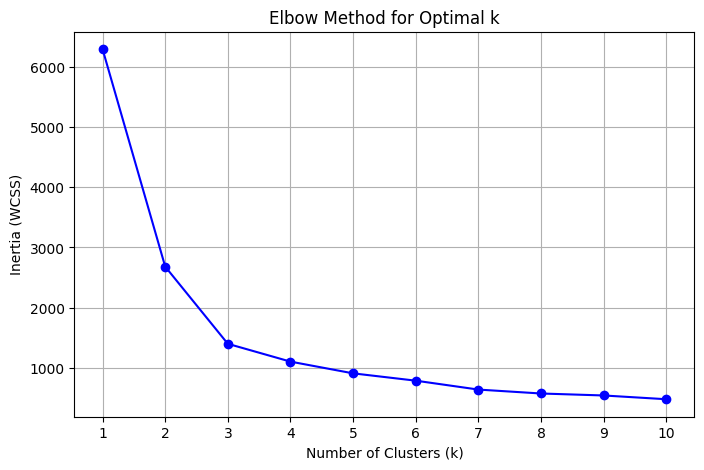


Fraud Rate per Cluster:
cluster
0    0.272289
1    0.290102
2    0.102041
Name: fraud_reported, dtype: float64


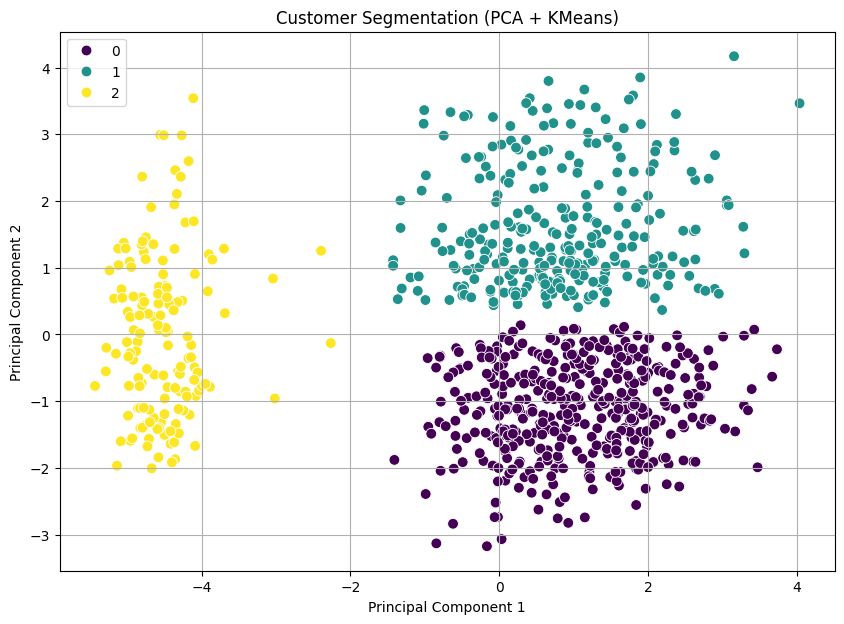

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



df_numeric = df.select_dtypes(include=[np.number])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

# k==3 is optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df['cluster'] = clusters


plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=60)
plt.title('Customer Segmentation (PCA + KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

fraud_by_cluster = df.groupby('cluster')['fraud_reported'].mean()
print("\nFraud Rate per Cluster:")
print(fraud_by_cluster)


In [ ]:
loading_df = pd.DataFrame(pca.components_, columns=df_numeric.columns, index=['PC1', 'PC2'])

print("Feature loadings (weights) for each principal component:")
print(loading_df.T.sort_values(by='PC1', ascending=False))  


Feature loadings (weights) for each principal component:
                                  PC1       PC2
total_claim_amount           0.409794  0.074368
vehicle_claim                0.399615  0.062469
property_claim               0.337010  0.073314
injury_claim                 0.335535  0.087008
collision_type               0.314284 -0.045931
number_of_vehicles_involved  0.215605 -0.012348
incident_hour_of_the_day     0.119433  0.093393
fraud_reported               0.093442  0.029862
capital-gains                0.036734 -0.025586
policy_deductable            0.013452  0.037906
insured_education_level      0.011897  0.038360
policy_state                 0.009549 -0.012313
insured_hobbies              0.007890 -0.118262
age                          0.007554  0.633464
bodily_injuries              0.006451  0.018648
months_as_customer           0.003789  0.630805
insured_occupation           0.002363  0.020192
witnesses                   -0.005027  0.114520
auto_year                   -0.

In [99]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(X_pca, clusters)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.510


In [100]:
print(f'Inertia (Sum of squared distances): {kmeans.inertia_}')


Inertia (Sum of squared distances): 1397.4230747104561
